<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-data-and-prepare-it-for-analysis" data-toc-modified-id="Download-data-and-prepare-it-for-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download data and prepare it for analysis</a></span></li><li><span><a href="#Set-functions-to-calculate-and-analyze-LTV,-ROI,-retention-and-conversion" data-toc-modified-id="Set-functions-to-calculate-and-analyze-LTV,-ROI,-retention-and-conversion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set functions to calculate and analyze LTV, ROI, retention and conversion</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Marketing" data-toc-modified-id="Marketing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Marketing</a></span></li><li><span><a href="#Estimate-the-return-on-advertising" data-toc-modified-id="Estimate-the-return-on-advertising-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Estimate the return on advertising</a></span></li><li><span><a href="#Write-conclusions" data-toc-modified-id="Write-conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Write conclusions</a></span></li></ul></div>

#  Study of the effectiveness of attracting users of a mobile application
You are a marketing analyst for the entertainment app Procrastinate Pro+. Despite huge investments in advertising, the company has been losing money for the past few months. Your task is to understand the reasons and help the company to become a plus.
There is data about users attracted from May 1 to October 27, 2019:
server log with data about their visits,
unloading their purchases for this period,
advertising expenses.
You will have to study:
where users come from and what devices they use,
how much it costs to attract users from various advertising channels;
how much money each client brings,
when the cost of attracting a client pays off,
What are the factors hindering customer acquisition?

### Download data and prepare it for analysis

Load data about visits, orders and advertising costs from CSV files into variables.

**File paths**

- visits: `/datasets/visits_info_short.csv`;
- orders: `/datasets/orders_info_short.csv`;
- costs: `/datasets/costs_info_short.csv`.

Examine the data and perform preprocessing. Are there any gaps or duplicates in the data? Make sure that the data types in all columns match the values ​​stored in them. Notice the date and time columns.

In [1]:
# 1. Importing Libraries:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# 2. Load data into dataframes from links:

visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
display(visits.head())
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
display(orders.head())
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<span style="color:blue">The visits_info_short.csv dataframe stores the server log with information about site visits, orders_info_short.csv stores information about orders, and costs_info_short.csv stores information about advertising costs. It is necessary to rename the columns: add a space character in the titles and remove capital letters.</span>

In [3]:
# 3. Let's bring the names of the columns in dataframes to lower case and add a space character ('_'):

visits.columns = visits.columns.str.lower()
visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'}, inplace=True)
display(visits.head())
orders.columns = orders.columns.str.lower()
orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'}, inplace=True)
display(orders.head())
costs.columns = costs.columns.str.lower()
display(costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<span style="color:blue">Column names changed to lower case, spaces added to column names.</span>

In [4]:
# 4.  Let's look at general information about dataframes:

visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

<span style="color:blue">There are 309901 rows and 6 columns in the visits_info_short dataframe, 40212 rows and 3 columns in the orders_info_short dataframe, 1800 rows and 3 columns in the costs_info_short dataframe. The data type in the columns with dates must be changed to datetime, in the remaining columns of the dataframes, the data types correspond to their actual content.</span>

In [5]:
# 5. Change data types in date columns to datetime:

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

<span style="color:blue">Date column data types cast to datetime.</span>

In [6]:
# 6. Let's see if there are data gaps in the dataframes:

display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

<span style="color:blue">There are no gaps in dataframes.</span>

In [7]:
# 7. Let's see if there are duplicates in dataframes:

print(visits.duplicated().value_counts())
print(orders.duplicated().value_counts())
print(costs.duplicated().value_counts())

False    309901
dtype: int64
False    40212
dtype: int64
False    1800
dtype: int64


<span style="color:blue">There are no duplicates in dataframes.</span>

<span style="color:blue">At the stage of data preparation, the names of the columns in all three dataframes are reduced to lower case, spaces are added to the names. In dataframes, in columns with dates, the data type is changed to datetime, in the remaining columns, the data types correspond to the actual contents of the columns. There are no gaps or duplicates in all three dataframes. Such data is suitable for further work..</span>

### Set functions to calculate and analyze LTV, ROI, retention and conversion

You are allowed to use the functions that you learned in the theory lessons.

These are functions for calculating metric values:

- `get_profiles()` — to create user profiles,
- `get_retention()` — to calculate Retention Rate,
- `get_conversion()` — to calculate conversion,
- `get_ltv()` — for calculating LTV.

As well as functions for plotting graphs:

- `filter_data()` — for data smoothing,
- `plot_retention()` — to plot the Retention Rate,
- `plot_conversion()` — to build a conversion chart,
- `plot_ltv_roi` — for visualizing LTV and ROI.

In [8]:
# 1. Let's define a function for getting user profiles:

def get_profiles(sessions, orders, ad_costs): #, event_names=[]):

    # we find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit 
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # adding flags for all events from event_names
#    for event in event_names:
#        if event in events['event_name'].unique():
#            profiles[event] = profiles['user_id'].isin(
#                events.query('event_name == @event')['user_id'].unique()
#            )

    # we count the number of unique users with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # we combine spending on advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # we divide advertising expenses by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding the cost of attraction to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
# 2. Let's set a function for calculating Retention Rate:

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # adding the payer column to the dimensions list being passed
    dimensions = ['payer'] + dimensions

    # we exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # we collect "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # a function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [10]:
# 3. Let's set a function for counting conversions:

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate the lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the size of the cohort and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, we remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time    

In [11]:
# 4. Let's define a function for calculating LTV:

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        # building a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate the cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # we combine the cohort sizes and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # counting LTV: divide each "cell" in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect a dataframe with user data and CAC values by adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate the average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # consider ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # deleting rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table, we leave the cohort sizes, CAC and ROI 
        # in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        #  return the LTV and ROI tables
        return result, roi

    # get the LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables, we remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    ) 

In [12]:
# 5. Let's define a function for smoothing the data:

def filter_data(df, window):
    # use a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [13]:
# 6. Let's set a function for plotting Retention Rate:

def plot_retention(retention, retention_history, horizon, window=7):

    # setting the grid size for graphs
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and retention of the first day
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table, we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the retention table indexes, add the second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the graph table there are two columns and two rows, four cells 
    # in the first one we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Life time')
    plt.title('Retention of paying users')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Life time')
    plt.title('Retention of non-paying users')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of paying users on the {}th day'.format(
            horizon
        )
    )

    # in the fourth cell — the dynamics of non-paying retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter the data and build a graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of non-paying users on the {}th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [14]:
# 7. Let's define a function for building a conversion graph:

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # setting the grid size for graphs
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table, we leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # the first graph is conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Life time')
    plt.title('User conversion')

    # the second graph is the conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # the columns of the pivot table will be all the columns of the index, except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of user conversion on the {}th day'.format(horizon))

    plt.tight_layout()
    plt.show()

In [15]:
# 8. Let's define a function for visualizing LTV and ROI:

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # setting the grid for drawing graphs
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table, we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the cost of attraction will be recorded in a separate frame
    cac_history = roi_history[['cac']]

    # exclude cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # the first graph is ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Life time')
    plt.title('LTV')

    # the second graph is the dynamics of ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of LTV users on the {}th day'.format(horizon))

    # the third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of the cost of attracting users')

    # the fourth graph is the roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Life time')
    plt.title('ROI')

    # the fifth chart is the dynamics of roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of user ROI on the {}th day'.format(horizon))

    plt.tight_layout()
    plt.show()

<span style="color:blue">The functions are set.</span>

### Research data analysis

- Create user profiles. Determine the minimum and maximum dates for attracting users.
- Find out which countries users come to the app from and which country accounts for the most paying users. Build a table showing the number of users and the share of payers from each country.
- Find out which devices are used by customers and which devices are preferred by paying users. Build a table showing the number of users and the percentage of payers for each device.
- Study the advertising sources of attraction and determine the channels from which the most paying users came. Build a table showing the number of users and the share of payers for each attraction channel.

In [16]:
# 1. Let's create user profiles, for which we will call the get_profiles function:

profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
# Determine the minimum and maximum dates for attracting users:

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print("Minimum user engagement date - ", min_date)
print("Maximum user engagement date - ", max_date) 

Minimum user engagement date -  2019-05-01
Maximum user engagement date -  2019-10-27


<span style="color:blue">User profiles are called, minimum and maximum user engagement dates are defined.</span>

In [18]:
# 2. Let's find out from which countries users come to the application and which country accounts
# for the most paying users. Let's build a table showing the number of users
# and the share of payers from each country:

display(
     profiles.groupby('region')
     .agg({'user_id': 'nunique', 'payer': 'mean'})
     .sort_values(by='payer', ascending = False)
)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


<span style="color:blue">Most users are from the USA, least of all from Germany. The largest share of paying users is also in the USA, the smallest share is in France.</span>

In [19]:
# 3. Let's determine which devices are used by customers and which devices are preferred by paying
# users. Let's build a table showing the number of users and the share of paying for each device:

display(
     profiles.groupby('device')
     .agg({'user_id': 'nunique', 'payer': 'mean'})
     .sort_values(by='payer', ascending = False)
)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


<span style="color:blue">Most customers use iPhones, least of all Mac and PC. The largest share of paying customers is accounted for by Mac users (perhaps, given the high cost of Macs, their users are the most solvent), the least - on PC.</span>

In [20]:
# 4. Let's study the advertising sources of attraction and determine the channels 
# from which the most paying users came. Let's build a table reflecting the number of users 
# and the share of payers for each attraction channel:

display(
     profiles.groupby('channel')
     .agg({'user_id': 'nunique', 'payer': 'mean'})
     .sort_values(by='payer', ascending = False)
)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


<span style="color:blue">Most of the users came independently (organic), of the channels of attraction the most popular are Facebook and TipTop. The largest share of paying customers is accounted for by users who came from the Facebook channel, in second and third places - from the AdNonSense and lambdaMediaAds channels, the least paid by customers who came on their own.</span>

### Marketing

- Calculate the total amount of marketing expenses.
- Find out how the expenses are distributed by advertising sources, that is, how much money was spent on each source.
- Build a visualization of the dynamics of expenditure changes over time (by weeks and months) for each source. Try to reflect this on one chart.
- Find out how much it cost on average to attract one user (CAC) from each source. Use user profiles.

Write intermediate conclusions.

In [21]:
# 1. Let's calculate the total amount of marketing expenses:

print('The total amount of marketing expenses was', round(costs['costs'].sum(), 1))

The total amount of marketing expenses was 105497.3


<span style="color:blue">The total amount of marketing expenses according to the costs dataframe was approximately 105,497. 3.</span>

In [22]:
# 2. Let's find out how the expenses are distributed by advertising sources, that is, how much money was spent
# on each source:

costs_per_channel = (
     costs.groupby('channel')
     .agg({'costs': 'sum'})
     .sort_values(by='costs', ascending = False)
)
costs_per_channel['percentage, %'] = round(costs_per_channel['costs']/costs_per_channel['costs'].sum()*100, 2)
display(costs_per_channel)

,costs,"percentage, %"
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


<span style="color:blue">Most of the money was spent on the TipTop advertising source, Facebook and WahooNetBanner were in second and third places, and Rabbit was the least..</span>

In [23]:
# 3. Let's build a visualization of the dynamics of changes in expenses over time 
# (by weeks and months) for each source. We will try to reflect this on one chart, 
# for which we will add columns with week and month numbers to the costs dataframe:

costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


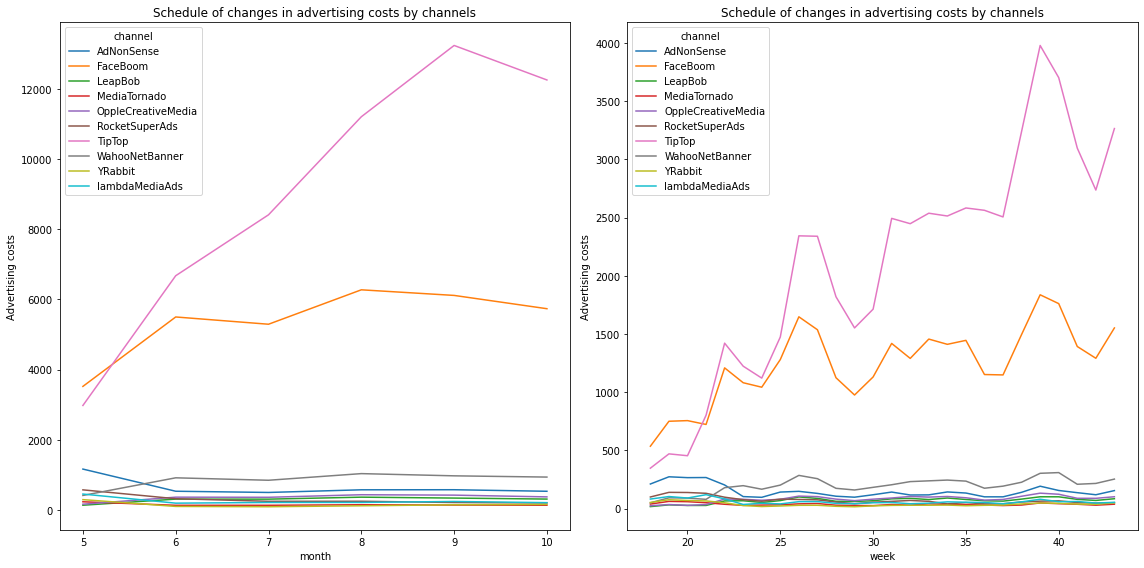

In [24]:
# We visualize the dynamics of expenditure changes over time (by weeks and months) for each source:

dates = [costs['month'], costs['week']]
plt.figure(figsize=(16, 8))
for i, part in enumerate(dates):
    (
    costs.pivot_table(index=part, columns='channel', values='costs', aggfunc='sum')
         .plot(ax = plt.subplot(1, 2, i + 1))
    )
    plt.title('Schedule of changes in advertising costs by channels')
    plt.ylabel('Advertising costs')
plt.tight_layout() 
plt.show()

<span style="color:blue">The schedule of distribution of advertising costs by weeks is more "noisy" than the schedule of distribution of costs by months. However, according to both graphs, it can be concluded that the cost of advertising on the Tip Top and Facebook platforms is significantly higher than the cost of advertising on other channels. The costs on the Tip Top platform in the period under review increased almost 4 times, and began to double the costs of advertising on the Faceboom platform, which in turn increased, but not as much as the costs on the Tip Top platform. Advertising costs for the remaining platforms remained virtually unchanged during the time period under review.</span>

In [25]:
# 4. Let's find out how much it cost on average to attract one user (CAC) 
# from each source, for which we use user profiles:

costs['dt'] = pd.to_datetime(costs['dt']).dt.date
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [26]:
# Let's determine the average cost of attracting each user through the channels of attraction:

cac_medium = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by = 'acquisition_cost', ascending = False)
profiles_with_out_organic = profiles[profiles['channel'] != 'organic']
cac_medium['diff_with_ac_mean, %'] = round(((cac_medium['acquisition_cost']/
                                           profiles_with_out_organic['acquisition_cost'].mean()) - 1)*100, 2)
display(cac_medium)

,acquisition_cost,"diff_with_ac_mean, %"
channel,,
TipTop,2.799003,148.25
FaceBoom,1.113286,-1.26
AdNonSense,1.008054,-10.59
lambdaMediaAds,0.724802,-35.71
WahooNetBanner,0.602245,-46.58
RocketSuperAds,0.412095,-63.45
OppleCreativeMedia,0.250000,-77.83
YRabbit,0.218975,-80.58
MediaTornado,0.218717,-80.60


<span style="color:blue">Tip Top channel is a clear leader in the cost of attracting users, which is two and a half times higher than the average cost of attracting. For other channels, the cost of attraction is lower than the average cost of attraction.</span>

### Evaluate the payback of advertising

Using LTV, ROI and CAC charts, analyze the payback of advertising. Consider that November 1, 2019 is on the calendar, and the business plan stipulates that users should pay off no later than two weeks after the attraction. Determine the need to include organic users in the analysis yourself.

- Analyze the payback of advertising using LTV and ROI charts, as well as LTV, CAC and ROI dynamics charts.
- Check the user conversion rate and the dynamics of its change. Do the same with user retention. Build and study conversion and retention charts.
- Analyze the payback of advertising by device. Plot LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- Analyze the payback of advertising by country. Plot LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- Analyze the payback of advertising by advertising channels. Plot LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- Answer these questions:
- Does advertising aimed at attracting users in general pay off?
- Which devices, countries and advertising channels can have a negative impact on the payback of advertising?
- What can cause payback problems?

Write a conclusion, describe the possible causes of the detected problems and interim recommendations for the advertising department.

In [27]:
# 1. Let's analyze the payback of advertising using DAY and ROI graphs, 
# as well as LTV, CAC and ROI dynamics graphs, for which we first cut off organic users:

profiles = profiles[profiles['channel'] != 'organic']

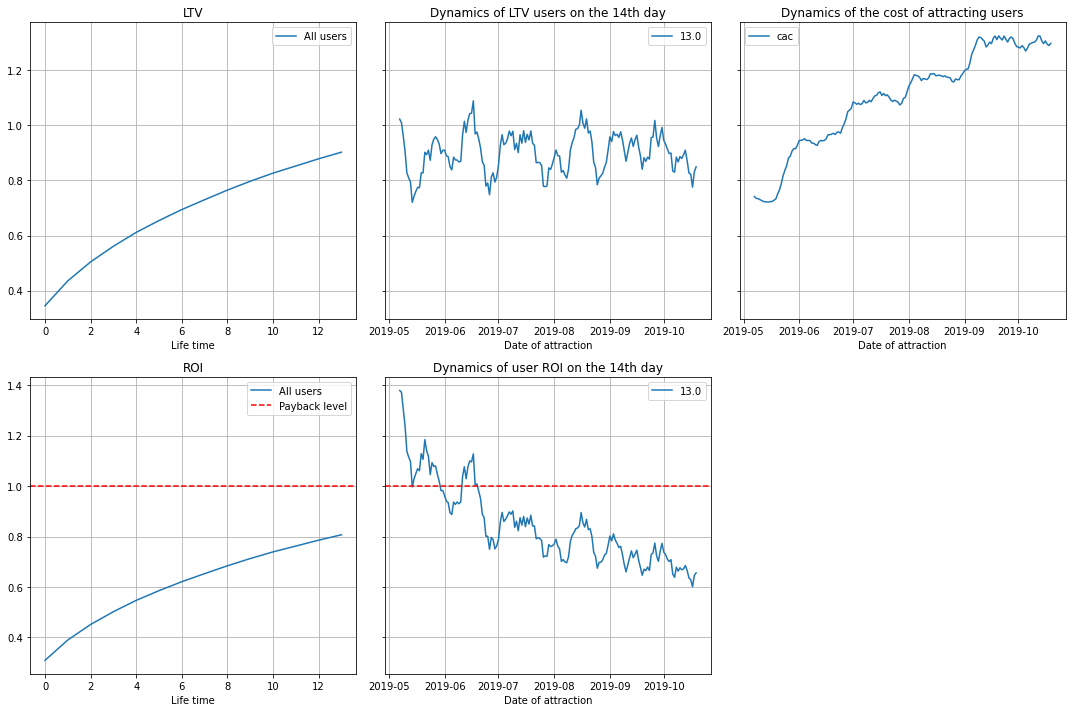

In [28]:
# Let's build LTV and ROI charts, as well as LTV, CAC and ROI dynamics charts 
# for the date 01.11.2019 with a horizon of 14 days:

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

<span style="color:blue">LTV in dynamics remains approximately at the same level, but CAC increases, as a result, ROI lies below the payback limit and decreases in dynamics. Thus, in general, advertising does not pay off.</span>

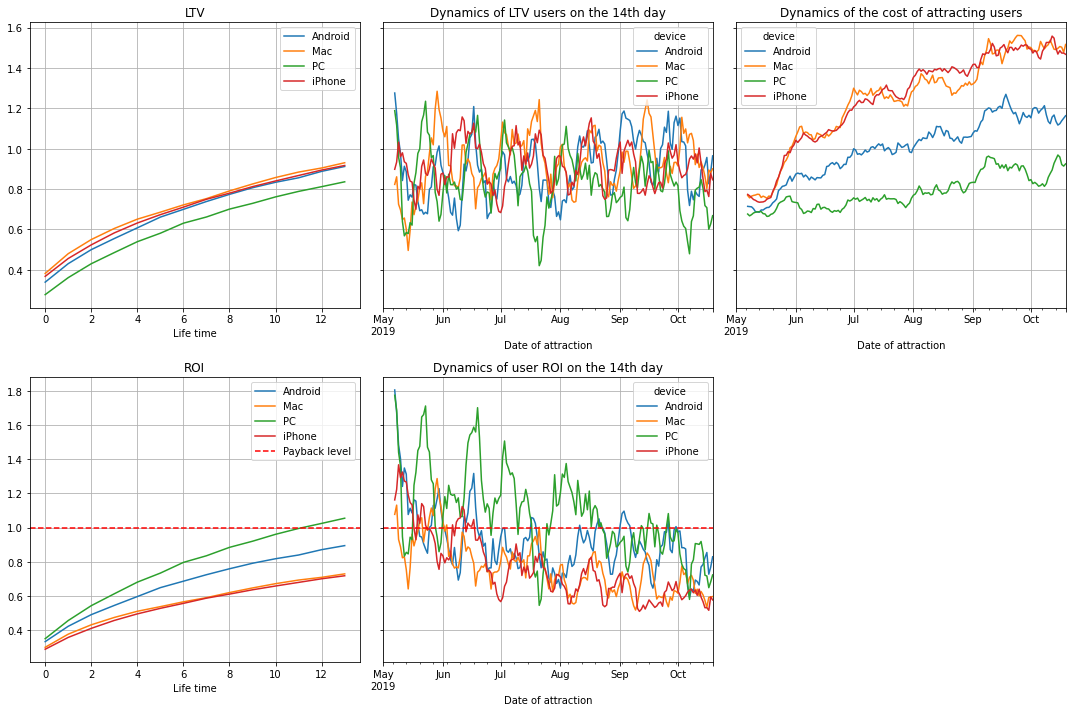

In [29]:
# 2. Let's analyze the payback of advertising by device. Let's plot DEM and ROI graphs, 
# as well as LTV, CAC and ROI dynamics graphs:

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device'],
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">In the distribution by device, LTV is about the same everywhere, but the cost of attracting users on Iphone and Mac is higher than on PC and Android. As a result, only the PC is above the payback limits, Android falls a little short of the payback line, and the Iphone and Mac have the lowest payback and do not reach the payback level. In dynamics, ROI decreases across all platforms, the PC platform has the biggest drop.</span>

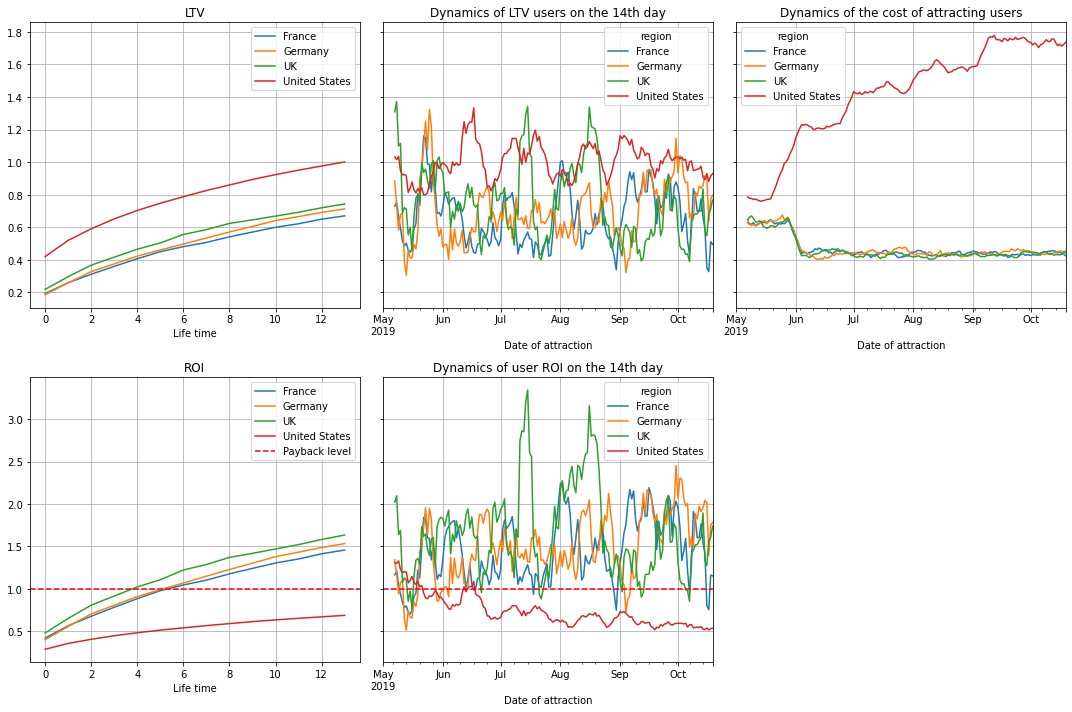

In [30]:
# 3. Let's analyze the payback of advertising by country. Let's plot DEM and ROI graphs, 
# as well as LTV, CAC and ROI dynamics graphs:

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'],
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">Most funds are raised in the United States, but the cost of raising funds in the United States is also the highest - about four times more than in other regions. As a result, on the ROI chart, the payback of advertising in the USA is the only one below the payback limit and its gradual decline is observed in dynamics.</span>

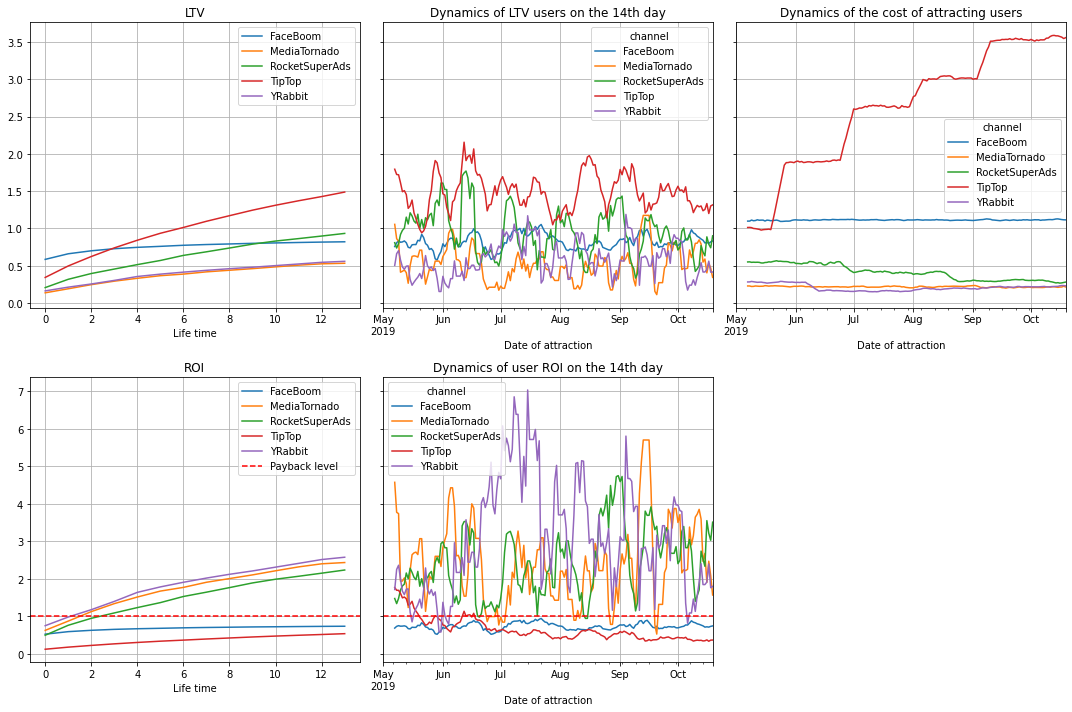

In [31]:
# Separately, we will analyze the payback of advertising in the United States 
# through the channels of attraction: 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles[profiles['region'] == 'United States'],
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">In the USA, LTV is kept at the unit level, while the cost of attracting increased from 0.8 to about 1.7. On the payback dynamics chart, we see that since mid-June, the payback has been falling below the payback level and falling further down.</span>

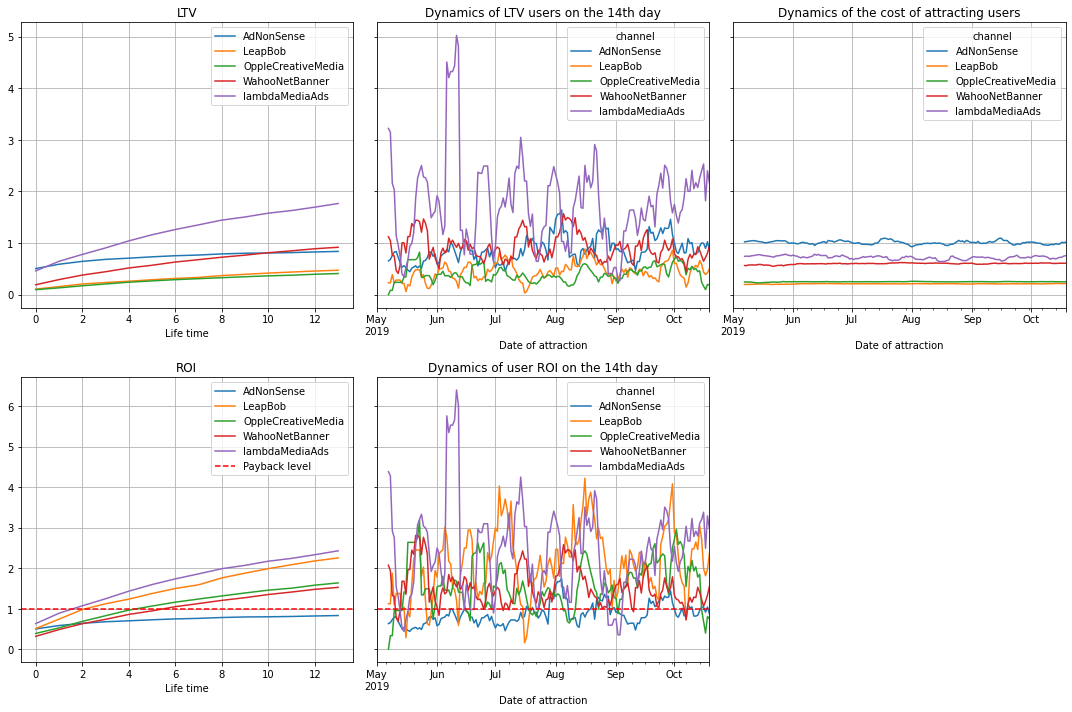

In [32]:
# Separately, we will analyze the payback of advertising 
# in Europe through the channels of attraction: 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles[profiles['region'] != 'United States'],
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">Europe has its own payback leaders: LeapBob channels, lambda media advertising, WahooNetBanner.</span>

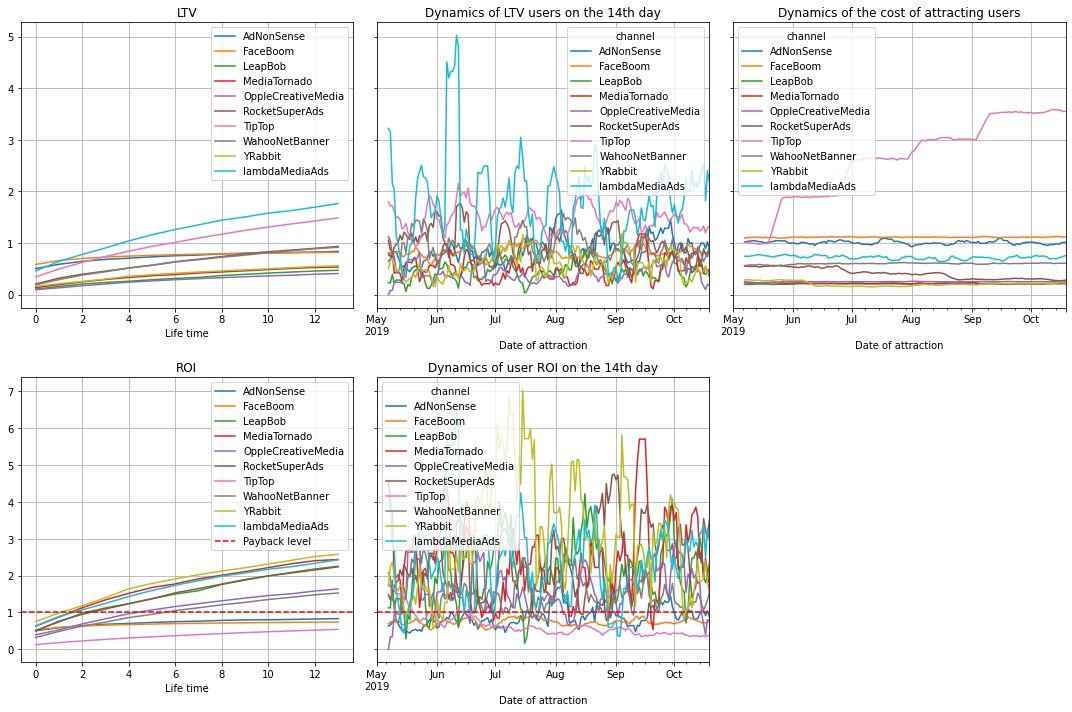

In [33]:
# 4. Let's analyze the payback of advertising using DAY and ROI charts, as well as LTV, 
# CAC and ROI dynamics graphs broken down by advertising channels: 

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">The leader in LTV is the lambdaMediaAds platform, in second place is the TipTop platform. The cost of attracting users from the Tip Top advertising network certainly grew and reached three and a half units. For the rest of the platforms, the cost of attraction in the period under review did not change and generally did not exceed one unit. In terms of payback, the leaders are YRabbit, Media Tornado, lambda Media Ads platforms. In turn, the Tip Top, Facebook and AdNonSense platforms lie below the payback limit.</span>

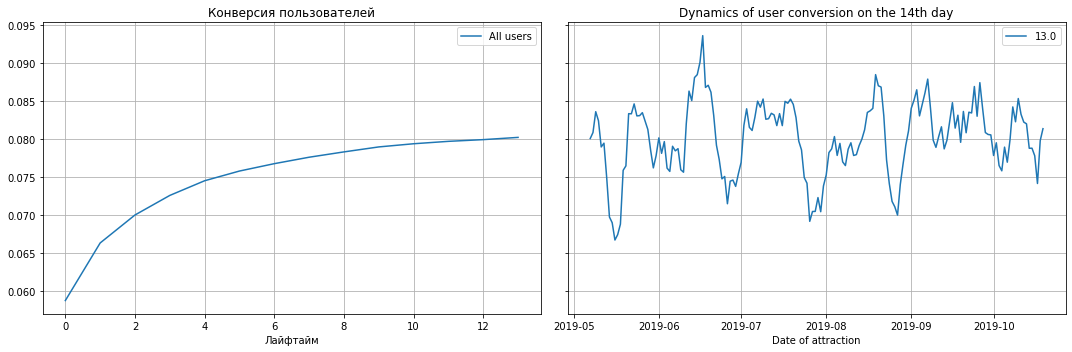

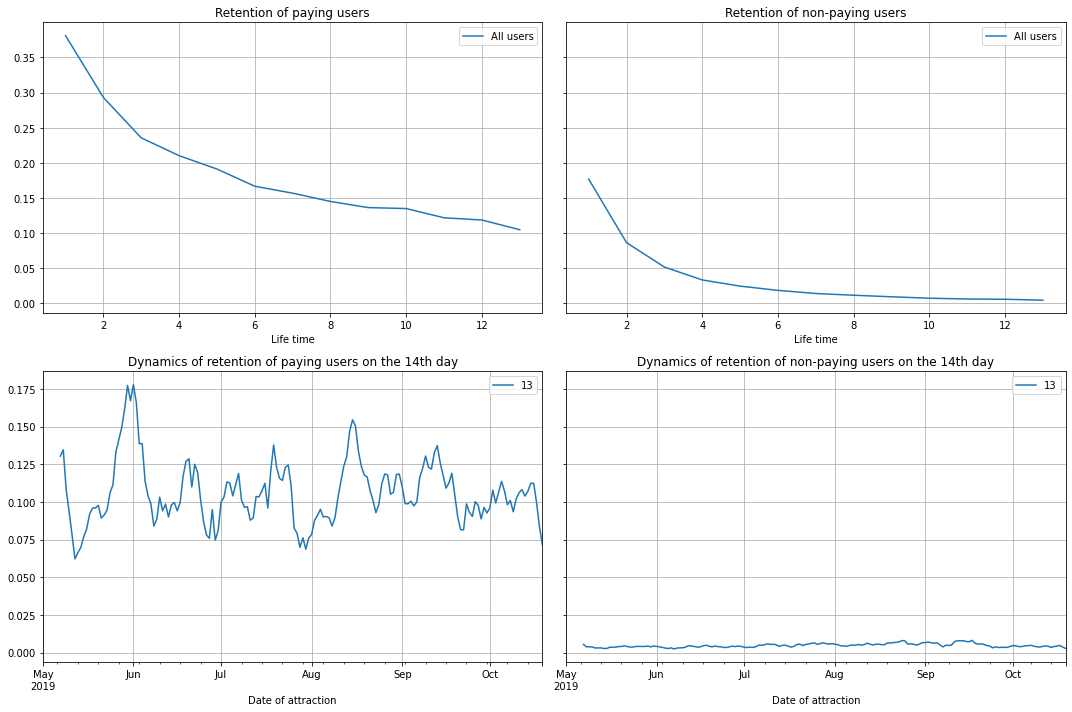

In [34]:
# 5. Let's check the overall user conversion and the dynamics of its changes:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)
plot_conversion(conversion, conversion_history, 14)

# Let's check user retention and plot its change schedule:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14 
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue">In dynamics, conversion and retention are kept at about the same level. Retention of paying users is higher than that of non-paying users.</span>

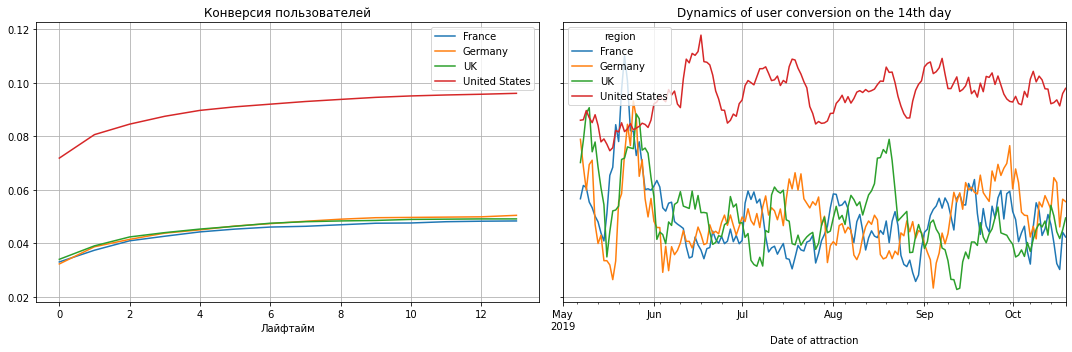

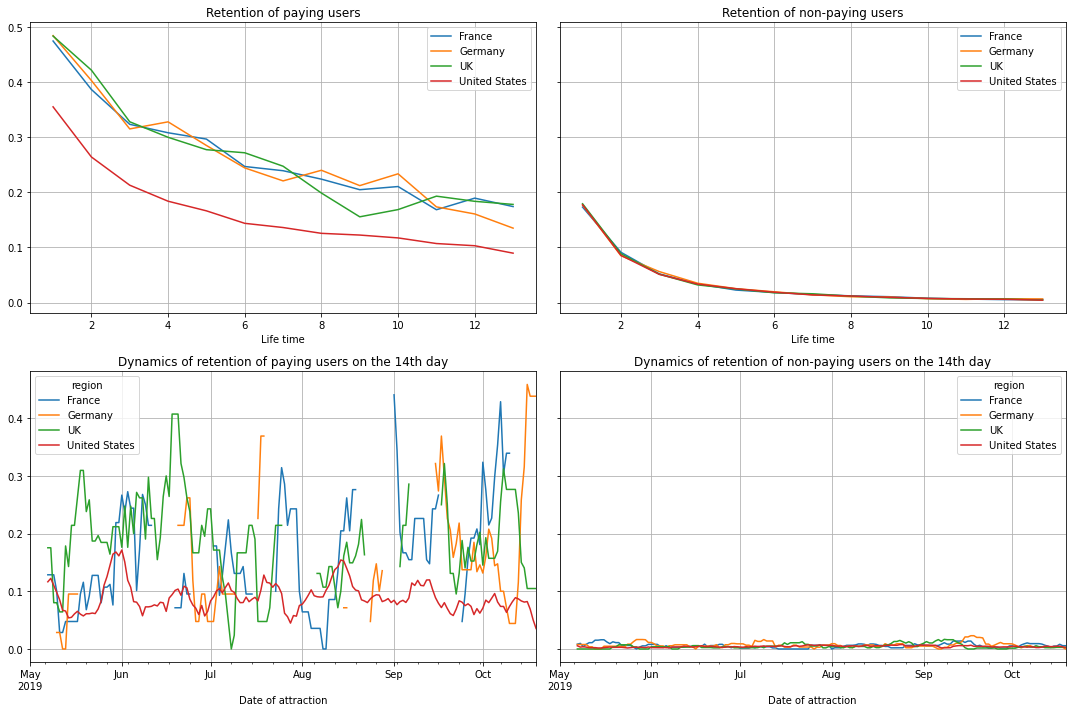

In [35]:
# 6. Let's check the user conversion and the dynamics of its changes by country:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region']
)
plot_conversion(conversion, conversion_history, 14)

# Let's check user retention and plot its change by country:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['region']
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue">User conversion in the US is higher than in other countries, but retention is lower. This may be the reason for the unprofitability of the United States as a region.</span>

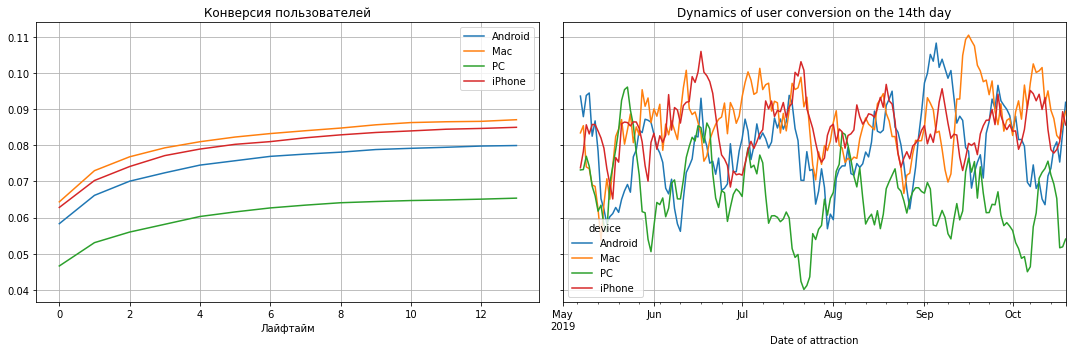

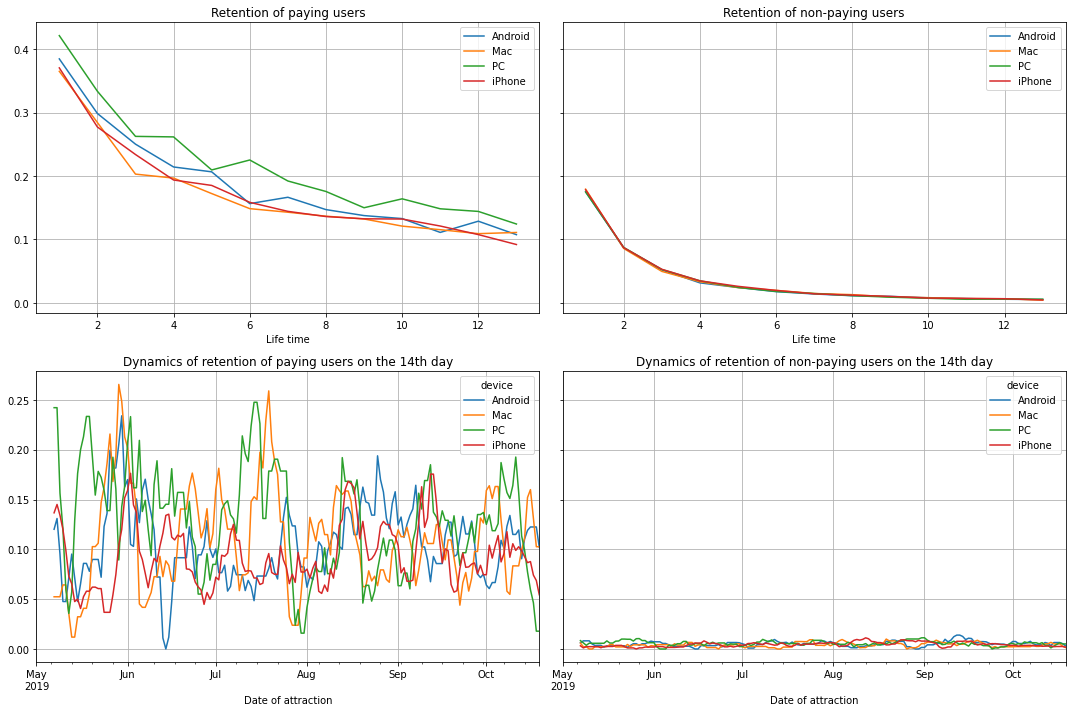

In [36]:
# 7. Let's check the user conversion and the dynamics of its changes by device:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device']
)
plot_conversion(conversion, conversion_history, 14)

# Let's check user retention and plot its change by device:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['device']
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue">The conversion rate on a PC is lower than on other devices, where the conversion rate is about the same. According to the dynamics of retention, all devices are approximately at the same level.</span>

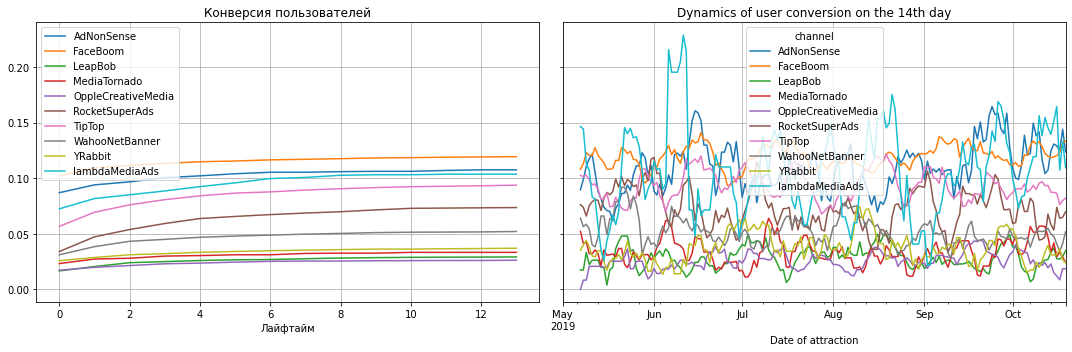

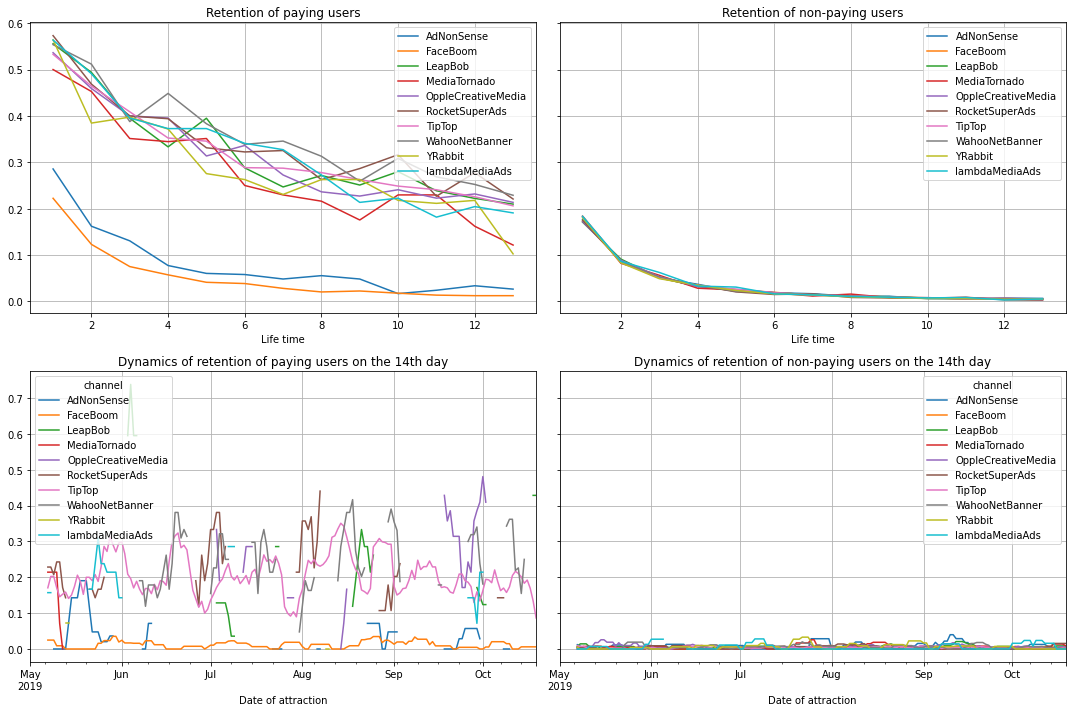

In [37]:
# 8. Let's check the conversion of users and the dynamics of its changes 
# through the channels of attraction:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)
plot_conversion(conversion, conversion_history, 14)

# Let's check user retention and build a schedule of its changes through the channels of attraction:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue"> The conversion rate is highest on the Facebook, Ad Non Sense, lambda Media Ads and TipTop engagement channels. AdNonSense and Facebook platforms show themselves the worst in terms of retention.</span>

### Write conclusions

- Highlight the reasons for the inefficiency of attracting users.
- Formulate recommendations for the marketing department.

<span style="color:blue">
    
According to the LTV, CAC and ROI charts, the following conclusions can be drawn:
- The return on investment in advertising the application is below the payback limits;
- conversion and retention of users in dynamics are kept at the same level;
- the costs of attracting users are high and continue to grow.

Let's highlight the problematic areas of investment in advertising:
- The USA is the most "paying" country, while the cost of attracting users to the USA is four times more than in other countries. User conversion in the USA is the largest, but user retention is the lowest of all countries. As a result, the USA is the only "non-paying" country and the return on investment continues to fall;
- Mac and iPhone are the most profitable devices, while the cost of attracting users for these devices is the highest. As a result, investments in these devices have the lowest payback;
- Tip Top, along with FaceBoom, is one of the two most popular channels for attracting users. At the same time, the cost of attracting users from this channel is 52% of the advertising budget, the cost of attracting a user is two and a half times higher than the average cost of attracting users across all channels. However, in terms of user retention, the channel has the worst indicator and, as a result, is below the payback limits;
- FaceBoom and AdNonSense have the most "paying" users among all channels, however, user retention on these channels is one of the lowest, as a result, both channels are below the payback limits.

Thus, the key problems in the directions of: USA region, Mac and iPhone devices, and type-top, FaceBoom and AdNonSense attraction channels are inflated user acquisition costs and low user retention.

The marketing department can be offered to redistribute investments in attracting users in the following areas:
- redistribute part of the advertising budget from the USA to Europe;
- within the USA, direct part of the advertising funds to the channels of attraction that pay off in the USA: Media Tornado, Rocket Super Ads, YRabbit;
- redistribute part of the funds from devices to Mac and iPhone and to less non-paying Android and PC devices;
- direct part of the advertising funds to the channels of attraction that pay off in Europe: LeapBob, advertising in lambda media, WahooNetBanner.

</span> 